# False Positives Analysis

In [ ]:
pip install scikit-learn joblib matplotlib

In the following code we report the analysis of false positive observations (non-top songs classified as top songs) identified by the selected Random Forest model. Analyzing false positives helps to understand the specific characteristics or features that lead to misclassifications. 

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
from collections import Counter
import re

### Random Forest model

In [17]:
# Run the random forest on already precalculated tfidf

rf_params = {
    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 300,
    'random_state': 80,
    'class_weight': 'balanced'
}

X_train_combined_tfidf = pd.read_csv('X_train_combined_tfidf_10000.csv')
y_train = pd.read_csv('y_train.csv')

y_train = y_train.iloc[:, 1]

# Check the shapes of the data
# print("Shape of X_train_combined_tfidf:", X_train_combined_tfidf.shape)
# print("Shape of y_train:", y_train.shape)

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train_combined_tfidf, y_train.values.ravel())

joblib.dump(rf, 'random_forest_textgenresent_retrained.joblib')

X_test_combined_tfidf = pd.read_csv('X_test_combined_tfidf_10000.csv')
y_test = pd.read_csv('y_test.csv')

y_test = y_test.iloc[:, 1]

y_pred = rf.predict(X_test_combined_tfidf)

#save the indexes of the predicted

false_positives = (y_pred == 1) & (y_test.values.ravel() == 0)

false_positive_indices = X_test_combined_tfidf[false_positives].index
false_positive_indices_df = pd.DataFrame(false_positive_indices, columns=["False Positive Indices"])

false_positive_indices_df.to_csv('false_positive_indices.csv', index=False)

In [18]:
# Got all the  informations about the songs based on the indexes

false_positive_indices = pd.read_csv('false_positive_indices.csv')
X_test = pd.read_csv('X_test.csv')

false_positive_observations = X_test.iloc[false_positive_indices['False Positive Indices']]
false_positive_observations.to_csv('false_positive_observations.csv', index=False)


In [19]:
X_test = pd.read_csv('X_test.csv')
fp_observations = pd.read_csv('false_positive_observations.csv')

### Most frequent words 

In [20]:
# get the most frequent words:

all_lyrics_cleaned1 = ' '.join(fp_observations['lyrics_cleaned'])
# Split into words
words1 = re.findall(r'\w+', all_lyrics_cleaned1)

all_lyrics_cleaned2 = ' '.join(X_test['lyrics_cleaned'])
# Split into words
words2 = re.findall(r'\w+', all_lyrics_cleaned2)

# Get word frequency
word_freq1 = Counter(words1)
word_freq2 = Counter(words2)

print(word_freq1.most_common(20))
print(word_freq2.most_common(20))


[('love', 742), ('baby', 543), ('know', 493), ('yeah', 414), ('got', 374), ('im', 350), ('na', 342), ('dont', 340), ('oh', 316), ('youre', 288), ('like', 270), ('get', 254), ('want', 242), ('girl', 231), ('time', 203), ('cause', 196), ('let', 192), ('one', 192), ('wan', 189), ('need', 187)]
[('im', 3832), ('love', 3099), ('know', 3006), ('dont', 2823), ('like', 2587), ('got', 2371), ('time', 2159), ('get', 2106), ('na', 1847), ('one', 1845), ('youre', 1788), ('oh', 1773), ('come', 1683), ('baby', 1654), ('yeah', 1602), ('go', 1569), ('see', 1560), ('never', 1461), ('cant', 1457), ('want', 1417)]


### Years distribution

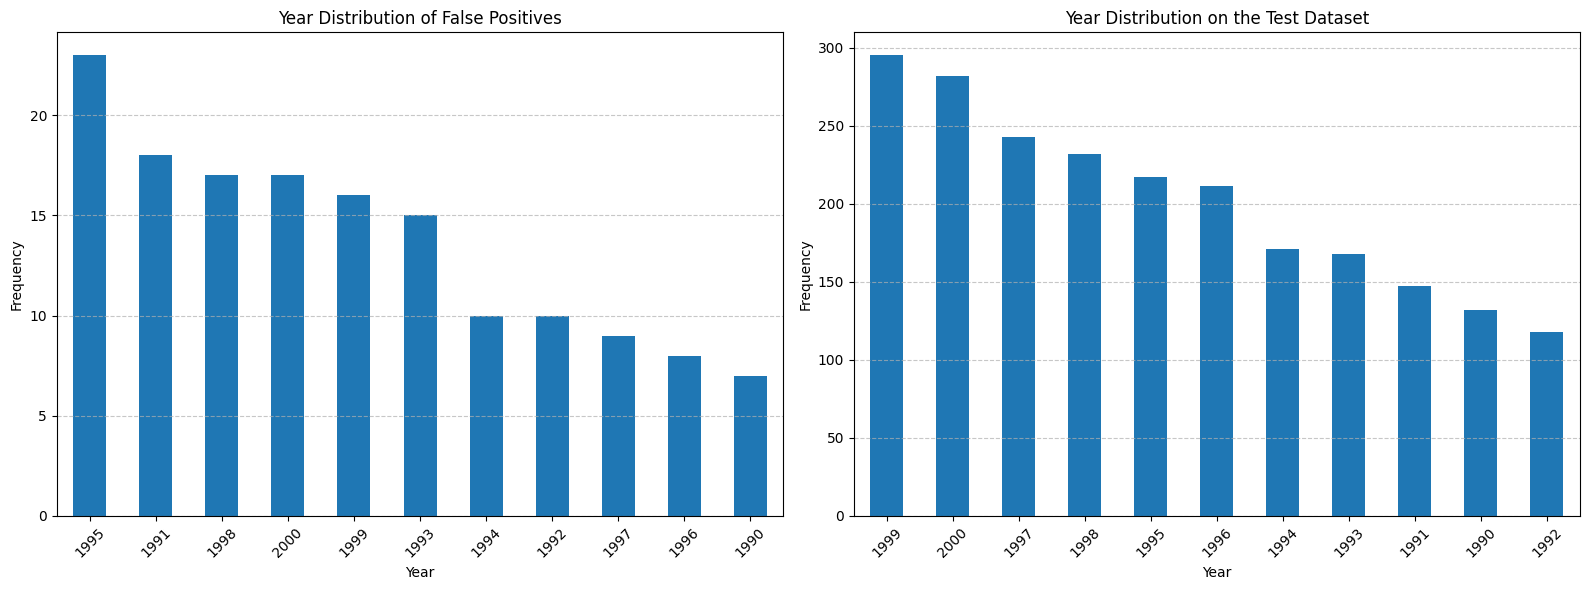

In [21]:
# Calculate year distributions
fp_year_distribution = fp_observations['year'].value_counts()
test_year_distribution = X_test['year'].value_counts()

# Plot the distributions side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for false positives
fp_year_distribution.plot(kind='bar', ax=ax1)
ax1.set_title('Year Distribution of False Positives')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency')
ax1.set_xticks(range(len(fp_year_distribution)))
ax1.set_xticklabels(fp_year_distribution.index, rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for test dataset
test_year_distribution.plot(kind='bar', ax=ax2)
ax2.set_title('Year Distribution on the Test Dataset')
ax2.set_xlabel('Year')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(len(test_year_distribution)))
ax2.set_xticklabels(test_year_distribution.index, rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Sentiment scores distribution

In [22]:
# The distribution of the sentiment

sentiment_stats1 = fp_observations[['negative', 'positive']].count()
print("Sentiment statistics of false positives:")
print(sentiment_stats1)

sentiment_stats2 = X_test[['negative', 'positive']].count()
print("Sentiment statistics of entire dataset:")
print(sentiment_stats2)


Sentiment statistics of false positives:
negative    150
positive    150
dtype: int64
Sentiment statistics of entire dataset:
negative    2216
positive    2216
dtype: int64


### Authors distribution

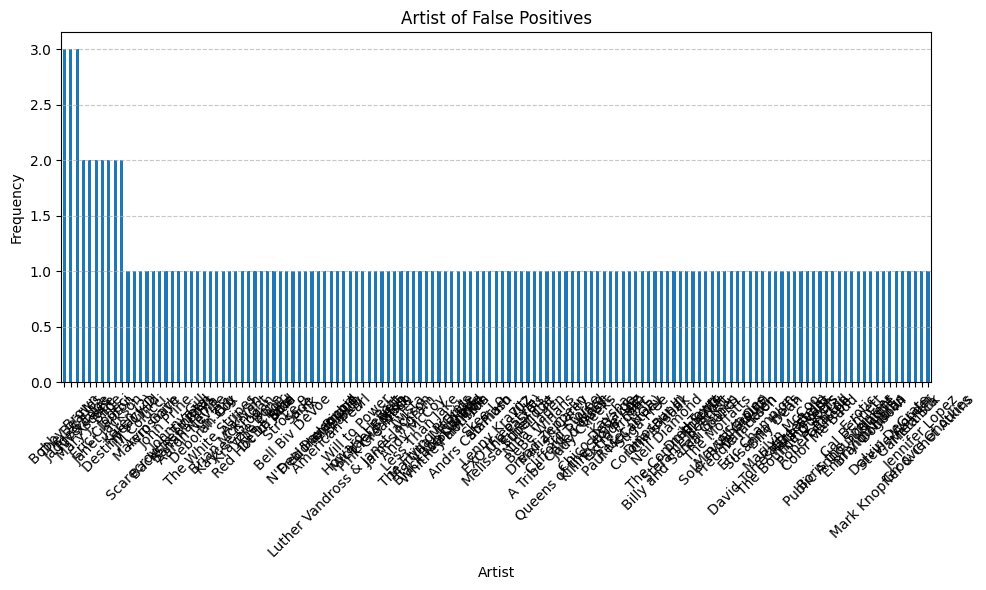

In [23]:
# The distribution of the authors

artist_distribution = fp_observations['artist'].value_counts()
plt.figure(figsize=(10, 6))
artist_distribution.plot(kind='bar')
plt.title('Artist of False Positives')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
artist_distribution = fp_observations['artist'].value_counts()
print("Artist distribution of false positives:")
print(artist_distribution.head(10))

Artist distribution of false positives:
artist
Bobby Brown        3
The Beatles        3
Jagged Edge        3
Riverdales         2
Mary J. Blige      2
Xscape             2
Eric Clapton       2
Janet Jackson      2
Jodeci             2
Destiny's Child    2
Name: count, dtype: int64


### Genres distribution

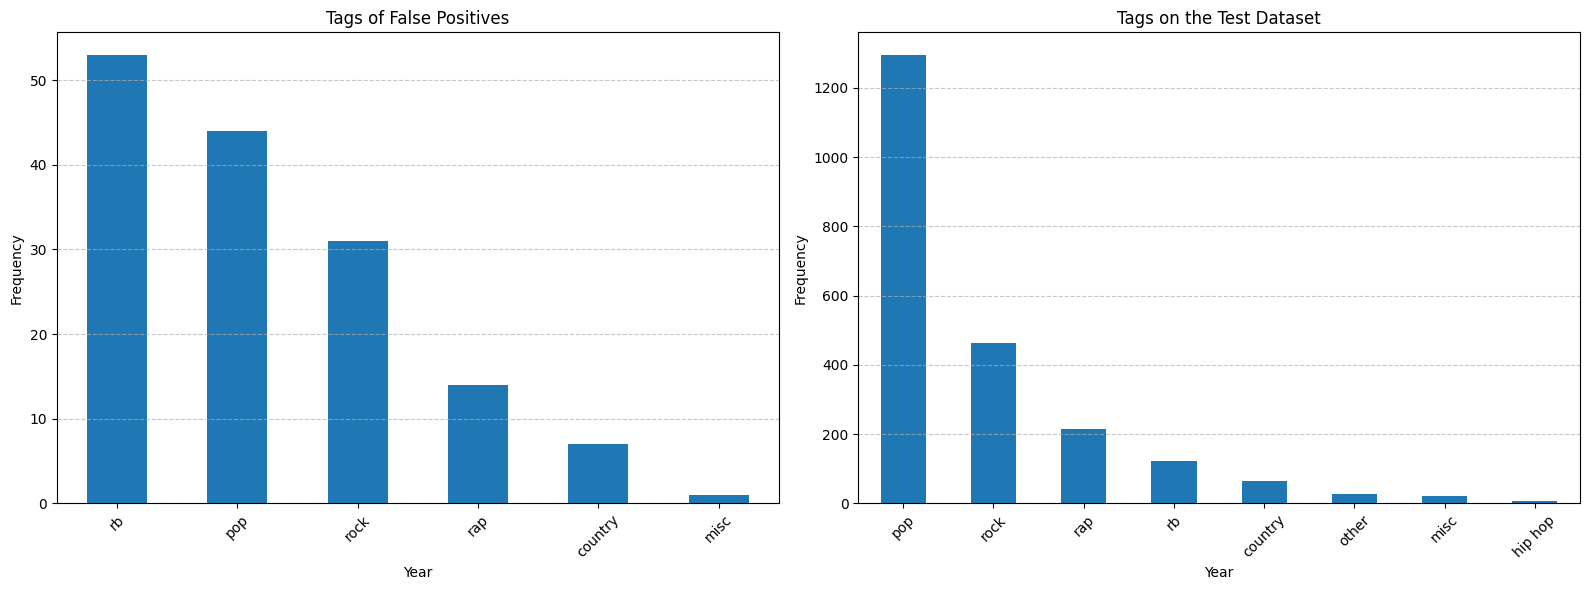

In [25]:
# The distribution of the tags

# Calculate year distributions
tag_distribution1 = fp_observations['tag'].value_counts()
tag_distribution2 = X_test['tag'].value_counts()

# Plot the distributions side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for false positives
tag_distribution1.plot(kind='bar', ax=ax1)
ax1.set_title('Tags of False Positives')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency')
ax1.set_xticks(range(len(tag_distribution1)))
ax1.set_xticklabels(tag_distribution1.index, rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for test dataset
tag_distribution2.plot(kind='bar', ax=ax2)
ax2.set_title('Tags on the Test Dataset')
ax2.set_xlabel('Year')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(len(tag_distribution2)))
ax2.set_xticklabels(tag_distribution2.index, rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()